In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt 

### Zadanie 1

In [2]:
def approx_d_tan(x,h):
    return (np.tan(x+h)-np.tan(x))/h

In [3]:
def d_tan(x):
    return 1+(np.tan(x)**2)

In [4]:
h = 10.0 ** -np.arange(0, 17)

In [5]:
x = 1

In [6]:
h

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09, 1.e-10, 1.e-11, 1.e-12, 1.e-13, 1.e-14, 1.e-15,
       1.e-16])

In [7]:
M = abs(2*np.tan(x)/np.cos(x)**2)
epsilon=sys.float_info.epsilon
computional_error = abs(d_tan(x) - approx_d_tan(x,h))
truncation_error = (M*h)/2
rounding_error = 2*epsilon/h

In [8]:
right_computional_error = computional_error.copy()

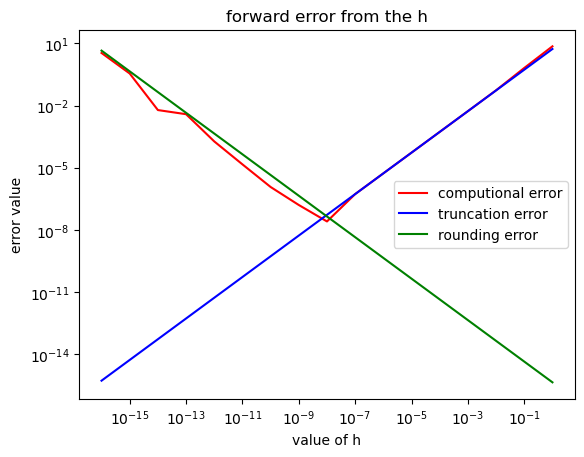

In [9]:
plt.title("forward error from the h") 
plt.xlabel("value of h") 
plt.ylabel("error value") 
plt.yscale("log")
plt.xscale("log")
plt.plot(h, computional_error, color ="red", label="computional error")
plt.plot(h, truncation_error, color ="blue", label="truncation error")
plt.plot(h, rounding_error, color ="green", label="rounding error")
plt.legend()
plt.show()

Lets zoom in on intresting area between 0 and 0.2

In [10]:
h = np.linspace(0+epsilon, 0.2, num=5000)

In [11]:
computional_error = abs(d_tan(x) - approx_d_tan(x,h))
truncation_error = (M*h)/2
rounding_error = 2*epsilon/h

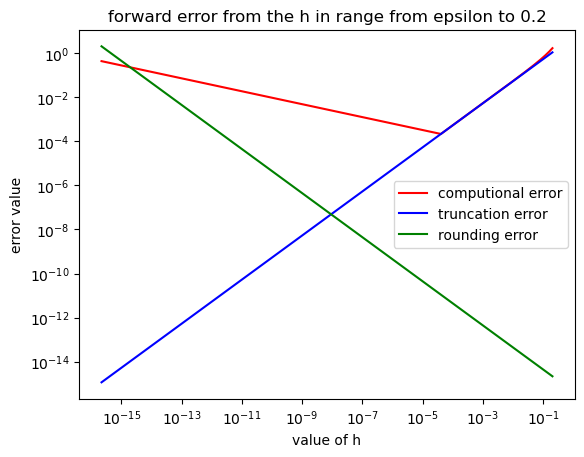

In [12]:
plt.title("forward error from the h in range from epsilon to 0.2") 
plt.xlabel("value of h") 
plt.ylabel("error value") 
plt.yscale("log")
plt.xscale("log")
plt.plot(h, computional_error, color ="red", label="computional error")
plt.plot(h, truncation_error, color ="blue", label="truncation error")
plt.plot(h, rounding_error, color ="green", label="rounding error")
plt.legend()
plt.show()

Now let's find minimal computional error

In [13]:
h = 10.0 ** -np.arange(0, 17)
computional_error = abs(d_tan(x) - approx_d_tan(x,h))
computional_error

array([7.16796641e+00, 6.48000505e-01, 5.43111357e-02, 5.34439650e-03,
       5.33587467e-04, 5.33502638e-05, 5.33462786e-06, 5.34023498e-07,
       2.55413526e-08, 1.58768116e-07, 1.17349951e-06, 1.44961758e-05,
       1.85343969e-04, 3.81145892e-03, 6.03190497e-03, 3.49239463e-01,
       3.42551882e+00])

In [14]:
min_computional_error = min(computional_error)
min_computional_error

2.554135258847623e-08

In [15]:
h_min = h[np.where(computional_error == min_computional_error)[0][0]]
h_min

1e-08

In [16]:
aprox_h_min = 2*np.sqrt(epsilon/M)
aprox_h_min

9.123695225180453e-09

In [17]:
h_min_diff = h_min - aprox_h_min

h_min_diff

8.763047748195471e-10

In [18]:
(h_min_diff/h_min) * 100

8.76304774819547

#### central difference method

In [19]:
def central_approx_d_tan(x,h):
    return (np.tan(x+h)-np.tan(x-h))/(2*h)

In [20]:
M=abs((2+4*np.sin(x)**2)/(np.cos(x)**4))
computional_error = abs(d_tan(x) - central_approx_d_tan(x,h))
truncation_error = (M/6)*h**2
rounding_error = epsilon/h

In [21]:
central_computional_error = computional_error.copy()

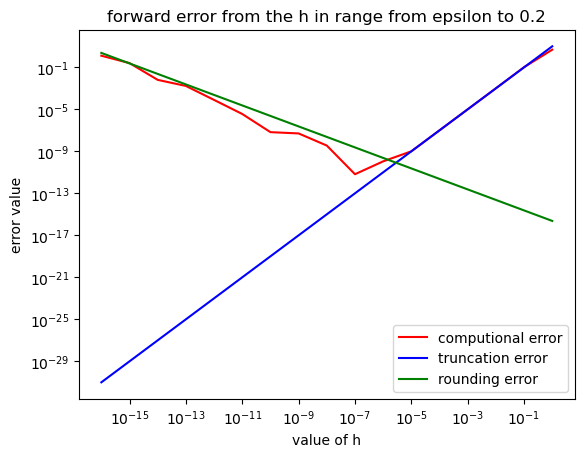

In [22]:
plt.title("forward error from the h in range from epsilon to 0.2") 
plt.xlabel("value of h") 
plt.ylabel("error value") 
plt.yscale("log")
plt.xscale("log")
plt.plot(h, computional_error, color ="red", label="computional error")
plt.plot(h, truncation_error, color ="blue", label="truncation error")
plt.plot(h, rounding_error, color ="green", label="rounding error")
plt.legend()
plt.show()

In [23]:
min_computional_error = min(computional_error)
min_computional_error

6.2230220976289274e-12

In [24]:
h_min = h[np.where(computional_error == min_computional_error)[0][0]]
h_min

1e-07

In [25]:
aprox_h_min = (3*epsilon/M)**(1/3)

In [26]:
aprox_h_min

2.273274156839064e-06

In [27]:
h_min_diff = abs(h_min - aprox_h_min)

h_min_diff

2.173274156839064e-06

In [28]:
(h_min_diff/h_min) * 100

2173.274156839064

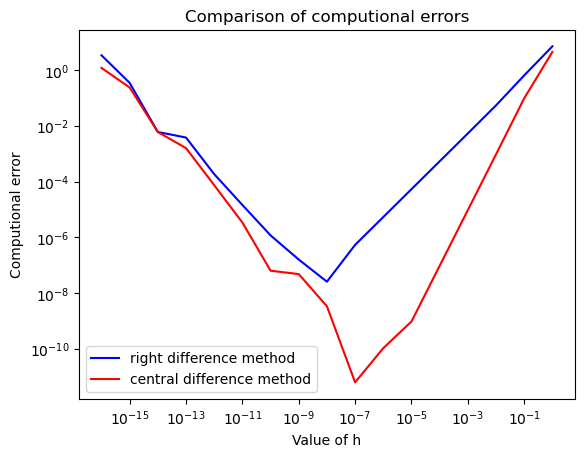

In [29]:
plt.title("Comparison of computional errors")
plt.xlabel("Value of h")
plt.ylabel("Computional error")
plt.xscale("log")
plt.yscale("log")
plt.plot(h, right_computional_error, color="blue", label="right difference method")
plt.plot(h, central_computional_error, color="red", label="central difference method")
plt.legend()
plt.show()

### Zadanie 2

In [30]:
from functools import cache
from fractions import Fraction

In [31]:
@cache
def x32(k):
    if(k==0): return np.float32(1/3)
    if(k==1): return np.float32(1/12)
    return (np.float32(2.25) * x32(k-1) - np.float32(.5)* x32(k-2))

@cache
def x64(k):
    if(k==0): return np.float64(1/3)
    if(k==1): return np.float64(1/12)
    return (np.float64(2.25) * x64(k-1) - np.float64(.5) * x64(k-2))

@cache
def x_fra(k):
    if(k==0): return Fraction(1,3)
    if(k==1): return Fraction(1,12)
    return (Fraction("2.25") * x_fra(k-1) - Fraction(1,2) * x_fra(k-2))
def xk(k):return (4.0**(-k))/3

In [32]:
argument_for_x32 = np.arange(start=0,stop=225,step=1)
argument_for_x64 = np.arange(start=0,stop=60,step=1)
argument_for_x_fra = np.arange(start=0,stop=225,step=1)
argument_for_xk = np.arange(start=0,stop=225,step=1)

In [33]:
%%capture
values_of_x32 = np.array([ x32(x) for x in argument_for_x32 ])
values_of_x64 = np.array([ x64(x) for x in argument_for_x64 ])
values_of_x_fra = np.array([ x_fra(x) for x in argument_for_x_fra ])
values_of_xk = np.array([ xk(x) for x in argument_for_xk ])

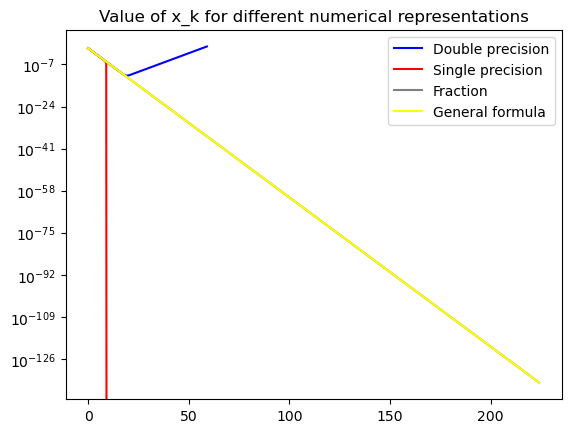

In [34]:
plt.title("Value of x_k for different numerical representations")
plt.semilogy(argument_for_x64, values_of_x64, color ="blue", label="Double precision")
plt.semilogy(argument_for_x32, values_of_x32, color ="red", label="Single precision")
plt.semilogy(argument_for_x_fra, values_of_x_fra, color ="gray", label="Fraction")
plt.semilogy(argument_for_xk, values_of_xk, color ="yellow", label="General formula")
plt.legend()
plt.show()

In [35]:
error_x32 = abs(values_of_x32 - values_of_xk)/values_of_xk
error_x64 = abs(values_of_x64 - values_of_xk[:60])/values_of_xk[:60]
error_fra = abs(values_of_x_fra - values_of_xk)/values_of_xk

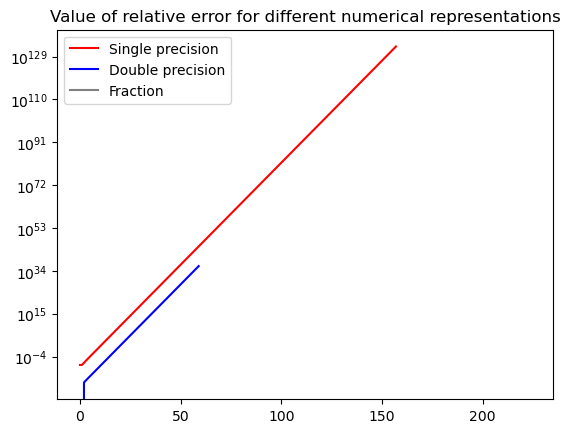

In [36]:
plt.title("Value of relative error for different numerical representations")
plt.semilogy(argument_for_x32, error_x32, color="red", label="Single precision")
plt.semilogy(argument_for_x64, error_x64, color="blue", label="Double precision")
plt.semilogy(argument_for_x_fra, error_fra, color="gray", label="Fraction")
plt.legend()
plt.show()